### Instalamos las librerias necesarias:

In [1]:
#pip install networkx
#pip install matplotlib

### Importamos las librerias necesarias:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

### Usando la busqueda exhaustiva:

#### Creamos nuestro Grafo:

In [3]:
cities = [1, 2, 3, 4, 5, 6, 7, 8]

distance_matrix = [
    [0, 29, 20, 21, 16, 31, 100, 12],
    [29, 0, 15, 29, 28, 40, 72, 21],
    [20, 15, 0, 15, 14, 25, 81, 9],
    [21, 29, 15, 0, 4, 12, 92, 12],
    [16, 28, 14, 4, 0, 16, 94, 9],
    [31, 40, 25, 12, 16, 0, 95, 24],
    [100, 72, 81, 92, 94, 95, 0, 90],
    [12, 21, 9, 12, 9, 24, 90, 0]
]

G = nx.Graph()
G.add_nodes_from(cities)

for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        G.add_edge(cities[i], cities[j], weight=distance_matrix[i][j])

#### Creamos los pares de recogida y entrega:

In [4]:
pickup_delivery_pairs = {5: 1, 7: 8, 2: 6, 4: 3}

#### Creamos la función de restricción de pick-up delivery:

In [5]:
def is_valid_tour(tour, pickup_delivery_pairs):
    pila = []
    
    for node in tour:
        if node in pickup_delivery_pairs:
            pila.append(node)
        elif node in pickup_delivery_pairs.values():
            if not pila:
                return False
            corresponding_pickup = pila.pop()
            if pickup_delivery_pairs[corresponding_pickup] != node:
                return False
    return True

#### Creamos la función para calcular la longitud del tour:

In [6]:
def calculate_tsp_tour_length(G, tour):
    length = 0
    for i in range(len(tour) - 1):
        length += G[tour[i]][tour[i+1]]['weight']
    length += G[tour[-1]][tour[0]]['weight']
    return length

#### Encontrar el mejor tour cumpliendo con la restricción de pick-up delivery:

In [7]:
best_tour = None
min_length = float('inf')

for tour in permutations(cities):
    if is_valid_tour(tour, pickup_delivery_pairs):
        initial_node = tour[0]
        current_length = calculate_tsp_tour_length(G, tour)
        
        if current_length < min_length:
            min_length = current_length
            best_tour = tour + (initial_node,)

#### Imprimir el mejor tour encontrado:

In [8]:
print(f"Mejor tour: {best_tour} con longitud: {min_length}")

Mejor tour: (2, 7, 8, 6, 4, 5, 1, 3, 2) con longitud: 253


#### Marcamos los nodos que son de pick-up (P) y los que son de delivery (D) para una mejor visualización:

In [9]:
labels = {}
node_colors = []

for city in cities:
    if city in pickup_delivery_pairs:
        labels[city] = f'{city} (P)'
        node_colors.append('lightgreen')
    elif city in pickup_delivery_pairs.values():
        labels[city] = f'{city} (D)'
        node_colors.append('lightcoral')
    else:
        labels[city] = str(city)
        node_colors.append('lightblue')

#### Visualizamos el resultado del camino optimo encontrado:

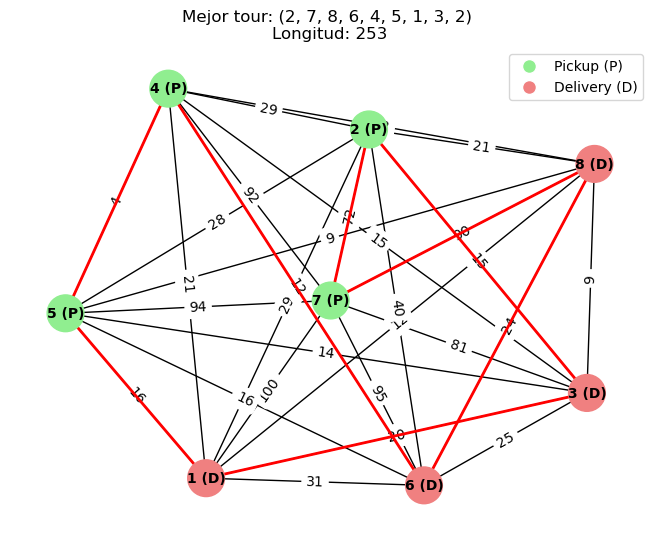

In [10]:
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=700, font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges = [(best_tour[i], best_tour[i+1]) for i in range(len(best_tour)-1)]
path_edges.append((best_tour[-1], best_tour[0]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Pickup (P)', markerfacecolor='lightgreen', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Delivery (D)', markerfacecolor='lightcoral', markersize=10)],
           loc='best')

plt.title(f'Mejor tour: {best_tour} \nLongitud: {min_length}')
plt.show()
